In [24]:
import numpy as np 
np.random.seed(1234)
import itertools
import functools
import seaborn as sns 
from tqdm import tqdm  

from perceptron import Perceptron
import matplotlib.pyplot as plt 
%matplotlib inline

In [25]:
def get_combinations(x, degree) : 
    return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items) : 
    return functools.reduce(lambda x, y : x*y, items)

def polynomial_transform(x, degree, logging = False) : 
    # convert to feature matrix 
    if x.ndim == 1 : 
        x = x[:,None]

    x_t = x.transpose()
    feature = [np.ones(len(x))] # populates 1s as first feature for each example 

    if logging : 
        print('Input : ', x)

    for degree in range(1, degree + 1) : 
        for items in get_combinations(x_t, degree) :  # generate combinations
            feature.append(compute_new_feature(items)) # combine feature into a new feature 
            if logging : 
                print(items, " : ", compute_new_feature(items))
    
    if logging : 
        print(np.asarray(feature).transpose())
    
    return np.asarray(feature).transpose()

In [26]:
class LabelTransformer(object) : 
    def __init__(self, n_classes: int = None) : 
        self.n_classes = n_classes

    @property
    def n_classes(self) : 
        return self.__n_classes

    @n_classes.setter 
    def n_classes(self, K) : 
        self.__n_classes = K 
        self.__encoder = None if K is None else np.eye(K)

    @property 
    def encoder(self) : 
        return self.__encoder

    def encode(self, class_indices:np.ndarray): 
        if self.n_classes is None : 
            self.n_classes = np.max(class_indices) + 1
        return self.encoder[class_indices]

    def decode(self, onehot : np.ndarray) : 
        return np.argmax(onehot, axis = 1)


In [27]:
class Perceptron : 

    def __init__(self) : 
        return 

    def predict(self, X) : 
        z = X @ self.w
        return np.where(z >= 0, 1, -1)

    def loss(self, X, y) :
        return np.sum(np.maximum(-1 * self.predict(X)*y, np.zeros(y.shape[0])))

    def train(self, X, y, epochs = 100, lr = 0.001) : 
        self.w = np.zeros(X.shape[1])
        self.w_all = []
        self.err_all = []

        for _ in tqdm(range(epochs)) : 
            errors = 0 
            for xi, target in zip(X, y) : 
                self.w += lr * (target - self.predict(xi))*xi 
                errors += (max(-1*self.predict(xi)*target, 0))

            self.err_all.append(errors)
            self.w_all.append(self.w)
            print('w : ', perceptron_obj.w)
            print('J(w) : ', perceptron_obj.err_all[-1])

            # if self.loss(X, y) == 0 : 
            #     break 

In [28]:
def create_toy_data(add_outliers = False, factor=1):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 2*factor
    x1 = np.random.normal(size=50).reshape(-1, 2) + 2*factor

    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([-np.ones(25), np.ones(30)]).astype(int)
    
    return np.concatenate([x0, x1]), np.concatenate([-np.ones(25), np.ones(25)]).astype(int)

In [29]:
from sklearn.model_selection import train_test_split 

def preprocess(add_class = False, add_outlier = False, degree = 1) : 
    X, y = create_toy_data(add_outlier, add_class)
    x_poly = polynomial_transform(X, degree= degree)
    x_train, x_test, y_train, y_test = train_test_split(x_poly, y)
    y_train_trans = LabelTransformer().encode(y_train)
    y_test_trans = LabelTransformer().encode(y_test)
    return x_train, x_test, y_train, y_test, y_train_trans, y_test_trans 

In [30]:
sns.set_context('notebook', font_scale= 1.5, rc = {'lines.linewidth' : 2.5})

def visualize_model(x_train, labels, lsc_obj, degree = 1) : 
    f = plt.figure(figsize=(8, 8))

    x1_min = np.min(x_train[:,1])
    x1_max = np.max(x_train[:,1])
    x2_min = np.min(x_train[:,2])
    x2_max = np.max(x_train[:,2])

    x1_test, x2_test = np.meshgrid(np.linspace(x1_min, x1_max, 100), np.linspace(x2_min, x2_max, 100))
    x_test = np.array([x1_test, x2_test]).reshape(2, -1).T
    x_test_poly = polynomial_transform(x_test, degree= degree)
    y_test = lsc_obj.predict(x_test_poly)

    sns.scatterplot(data = x_train, x = x_train[:, 1], y = x_train[:,2], hue = labels)
    plt.contourf(x1_test, x2_test, y_test.reshape(100, 100), alpha = 0.5, levels = np.linspace(0, 1, 3))

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.gca().set_aspect('equal', adjustable = 'box')
    plt.show()

## Linearly seperable 

In [31]:
x, y = create_toy_data()
x_poly = polynomial_transform(x, degree= 1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

100%|██████████| 100/100 [00:00<00:00, 875.29it/s]


w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0
w :  [0.         8.89739191 5.35833659]
J(w) :  0


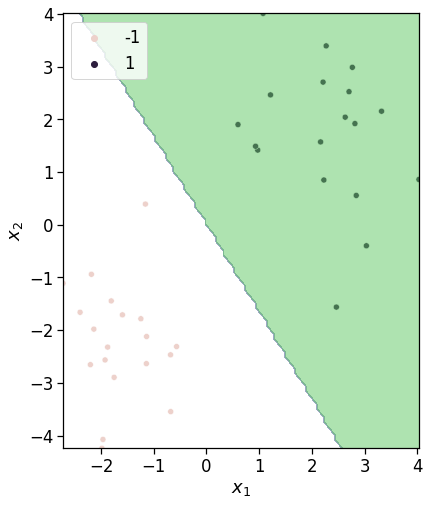

In [32]:
perceptron_obj = Perceptron()
perceptron_obj.train(x_train, y_train, lr = 1)
visualize_model(x_train, y_train, perceptron_obj, degree=1)

In [33]:
perceptron_obj.err_all

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

Text(0.5, 1.0, 'Learning curve')

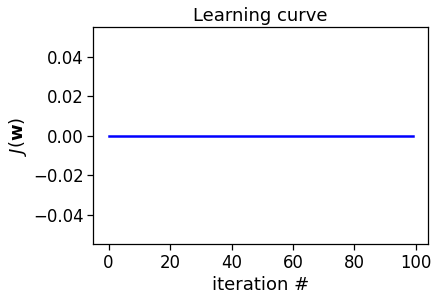

In [ ]:
plt.plot(np.arange(len(perceptron_obj.err_all)), perceptron_obj.err_all, 'b-')
plt.xlabel('iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title('Learning curve')

## Linearly not seperable 

w :  [-2.          2.94800045  4.07215759]
J(w) :  3
w :  [0.         1.25390578 3.3162758 ]
J(w) :  3
w :  [0.         0.14408304 1.19093451]
J(w) :  3
w :  [0.         2.74916054 2.80215875]
J(w) :  1
w :  [0.         2.70489489 5.60220929]
J(w) :  3
w :  [0.         1.89727677 3.84300783]
J(w) :  1
w :  [0.         2.13578271 1.93289309]
J(w) :  1
w :  [0.         2.94198368 2.5242344 ]
J(w) :  0
w :  [2.         0.59353188 2.72148625]
J(w) :  0
w :  [0.         1.26836351 2.64401061]
J(w) :  3
w :  [2.         0.86562189 2.06328672]
J(w) :  1
w :  [0.         3.27789861 4.68012924]
J(w) :  0
w :  [0.         1.86394006 4.14937845]
J(w) :  2
w :  [0.         2.102446   2.23926371]
J(w) :  1
w :  [0.         3.11203464 5.26992055]
J(w) :  1
w :  [0.         2.30441652 3.51071909]
J(w) :  1
w :  [0.         1.56204047 5.73347214]
J(w) :  2
w :  [0.         2.15076773 4.46481426]
J(w) :  3
w :  [0.         2.38927367 2.55469952]
J(w) :  1
w :  [0.         2.34500802 5.35475006]
J(w) : 

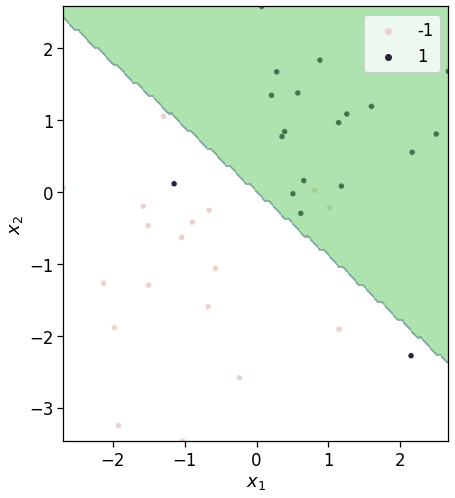

In [ ]:
x, y = create_toy_data(factor=0.5)
x_poly = polynomial_transform(x, degree=1)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y)

perceptron_obj = Perceptron()
perceptron_obj.train(x_train, y_train, lr=1)
visualize_model(x_train, y_train, perceptron_obj, degree=1)

In [ ]:
perceptron_obj.err_all

[3,
 3,
 3,
 1,
 3,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 1,
 0,
 2,
 1,
 1,
 2,
 1,
 2,
 3,
 0,
 3,
 1,
 2,
 3,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 1,
 3,
 0,
 3,
 2,
 2,
 3,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 2,
 1,
 1,
 1,
 3,
 1,
 2,
 2,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 3,
 1,
 2,
 3,
 0,
 3,
 3,
 2,
 3,
 1,
 2,
 1,
 0,
 0]

Text(0.5, 1.0, 'Learning curve')

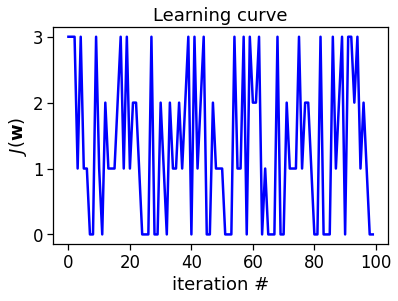

In [ ]:
plt.plot(np.arange(len(perceptron_obj.err_all)), perceptron_obj.err_all, 'b-')
plt.xlabel('iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title('Learning curve')

w :  [ 2.          1.73654488 -1.41742151 -4.83435616 -0.16281563 -6.84564384]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.50864159  0.76417137 -6.72804018  1.63492441 -7.43195982]
J(w) :  0
w :  [ 6.         -0.

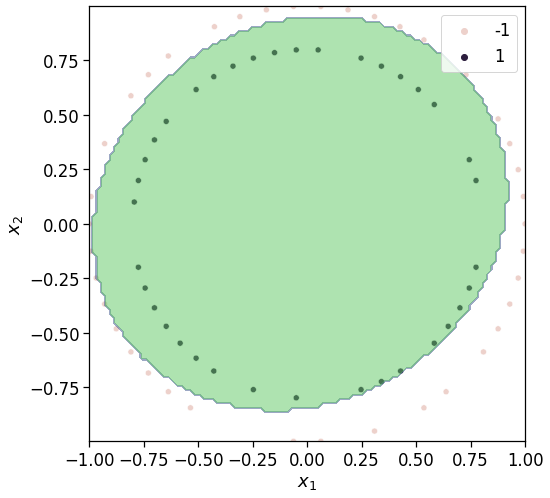

In [ ]:
from sklearn.datasets import make_circles
x, y = make_circles()
y_trans = np.where(y==0, -1, 1)
x_poly = polynomial_transform(x, degree=2)
x_train, x_test, y_train, y_test = train_test_split(x_poly, y_trans)

perceptron_obj = Perceptron()
perceptron_obj.train(x_train, y_train, lr=1)
visualize_model(x_train, y_train, perceptron_obj, degree=2)

Text(0.5, 1.0, 'Learning curve')

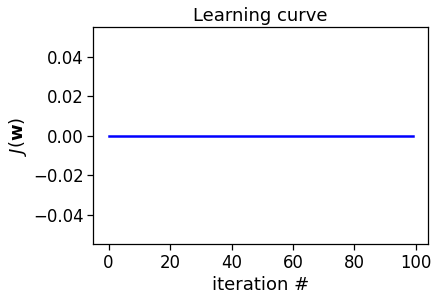

In [ ]:
plt.plot(np.arange(len(perceptron_obj.err_all)), perceptron_obj.err_all, 'b-')
plt.xlabel('iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title('Learning curve')